In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df = pd.read_csv("drug_resp.csv", header = None)
df = df.T

f1 = df[0].values

In [6]:
f1

array([3.44596542, 4.12436693, 3.44531661, 3.8072139 , 4.7491037 ,
       3.54664952, 3.92667131, 4.50283979, 3.64987564, 2.47761955,
       2.30746414, 3.48474091, 3.12856501, 5.53655962, 4.00476444,
       5.28227855, 2.83104551, 3.31077395, 3.2641083 , 0.51482621,
       2.52386528, 4.30714736, 5.14351358, 5.12024365, 4.46715692,
       4.25235695, 4.30947019, 4.85290375, 5.20609217, 5.02308207,
       4.46684143, 4.07934358, 2.20326592, 4.75116834, 5.87403604,
       5.42133899, 1.80587183, 4.39844918, 3.85459223, 4.73986989,
       2.21709767, 3.10415414, 4.08115024])

In [3]:
k_means = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [8]:
drug = f1
drug_2d = drug.reshape(-1,1)
k_means.fit(drug_2d)
Z = k_means.predict(drug_2d)

Text(0.5, 1.0, 'Kmeans cluster centroids')

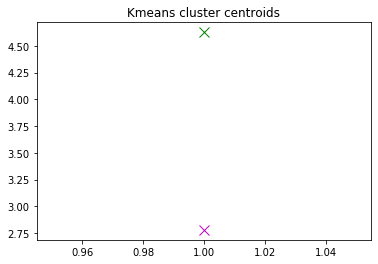

In [9]:
colors = ['m','g']
centroids = k_means.cluster_centers_
for n, y in enumerate(centroids):
    plt.plot(1, y, marker='x', color=colors[n], ms=10)
plt.title('Kmeans cluster centroids')

Text(0.5, 1.0, 'Points by cluster')

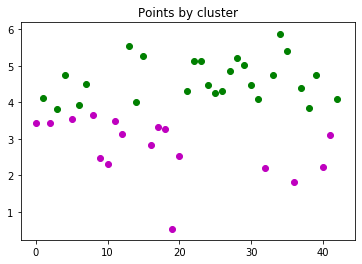

In [13]:
# Plot each class as a separate colour
n_clusters = 2
f1_series = pd.Series(range(0, 43))

for n in range(n_clusters):
    # Filter data points to plot each in turn.
    ys = f1[ Z==n ]
    xs = f1_series[ Z==n ]

    plt.scatter(xs, ys, color=colors[n])

plt.title("Points by cluster")

In [17]:
drug1 = pd.DataFrame()
drug1['IC50'] = df.iloc[:][0] 
drug1['Label'] = Z
drug1 = drug1.sort_values(by ='IC50')
drug1.reset_index(drop=True,inplace=True)
print(drug1)
#print(drug1.iloc[1][:])

        IC50  Label
0   0.514826      0
1   1.805872      0
2   2.203266      0
3   2.217098      0
4   2.307464      0
5   2.477620      0
6   2.523865      0
7   2.831046      0
8   3.104154      0
9   3.128565      0
10  3.264108      0
11  3.310774      0
12  3.445317      0
13  3.445965      0
14  3.484741      0
15  3.546650      0
16  3.649876      0
17  3.807214      1
18  3.854592      1
19  3.926671      1
20  4.004764      1
21  4.079344      1
22  4.081150      1
23  4.124367      1
24  4.252357      1
25  4.307147      1
26  4.309470      1
27  4.398449      1
28  4.466841      1
29  4.467157      1
30  4.502840      1
31  4.739870      1
32  4.749104      1
33  4.751168      1
34  4.852904      1
35  5.023082      1
36  5.120244      1
37  5.143514      1
38  5.206092      1
39  5.282279      1
40  5.421339      1
41  5.536560      1
42  5.874036      1
